In [44]:
# konlpy 패키지 설치: 한국어 형태소 분석을 위한 라이브러리입니다.
!pip install konlpy  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# pandas 라이브러리를 pd라는 이름으로 임포트: 데이터 처리를 위한 주요 라이브러리입니다.
import pandas as pd  

# konlpy 라이브러리에서 Okt 형태소 분석기를 임포트: 한국어 텍스트를 형태소 단위로 분석합니다.
from konlpy.tag import Okt  

# 엑셀 파일을 데이터프레임 형태로 불러오기: 분석할 뉴스 데이터를 불러옵니다.
df = pd.read_excel('/content/NewsResult_20231129-20240229.xlsx')

# '제목'과 '본문' 컬럼을 합쳐 '제목_본문'이라는 새로운 컬럼을 생성합니다.
df['제목_본문'] = df['제목'] + df['본문']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [46]:
df['제목_본문']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       “대학생 취업난 극복에 도움 주고파” 한국유나이티드제약, 관련 전공자 취업지원 행사...
1       한국 휩쓴 ‘성공 포르노’ 혹시 당신의 마음도 훔쳤나요? [스페셜리포트]“성공하려면...
2       한화오션 英밥콕, 글로벌 잠수함 ‘협력 합의서’ 체결한화오션은 영국 밥콕 인터내셔널...
3       핀크 '리얼리' 이용자, 작년 연봉 평균 9.9% 인상 인상률 높은 MBTI는[머니...
4       [이 주의 새 책] 장벽 너머 外■풀 \n \n 일본군 위안부 피해자 이옥선 할머니...
                              ...                        
1997    드림어스컴퍼니, 글로벌 엔터기업 타이탄 콘텐츠 투자사로 참여드림어스컴퍼니가 글로벌 ...
1998    애플 2029년까지 예정됐던 골드만삭스와의 파트너십 해지한다애플카드, 애플 예금 계...
1999    “카톡 먹통 호통치던 정부, 행정망 마비엔 ‘관대’ 재난 편입 서둘러야”[현안 인터...
2000    [미래의 대학 사이버대학교] 실감형 교육 콘텐트, 실시간 화상교육 도입대구사이버대학...
2001    [스타트업 리포트]넘쳐나는 '돌팔이 의학 동영상' 보다 못해... 의학정보 스타트업...
Name: 제목_본문, Length: 2002, dtype: object

In [47]:
# Okt 형태소 분석기 객체를 생성합니다. 한국어 텍스트 분석을 위한 준비 단계입니다.
okt = Okt()  

# 텍스트 데이터를 형태소 단위로 분석하여 특정 품사(명사, 형용사, 동사)만 추출하는 함수입니다.
def tokenizer(text):
    morph = okt.pos(text)
    words = []
    for word, tag in morph:
        if tag in ['Noun', 'Adjective', 'Verb']:
            if len(word) > 1:  # 한 글자보다 긴 단어만 선택
                words.append(word)
    return words

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
# 데이터프레임의 모든 데이터를 문자열 타입으로 변환합니다. 이는 형태소 분석을 위한 준비 단계입니다.
df = df.astype('str')

#'제목_본문' 컬럼에 tokenizer 함수를 적용하여, 형태소 분석을 수행하고 결과를 다시 해당 컬럼에 저장합니다.
df['제목_본문'] = df['제목_본문'].apply(tokenizer)

# 데이터프레임의 모든 열을 문자열 타입으로 변환합니다. 안전한 파일 저장을 위한 단계입니다.
df = df.astype('str')

# 데이터프레임을 '정제파일.csv'로 저장합니다. 분석 결과를 파일로 저장하는 단계입니다.
df.to_csv('정제파일.csv', encoding='utf-8')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df['제목_본문']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        대학생 취업 극복 도움 주고 한국 유나이티드 제약 관련 전공자 취업 지원 행사 개...
1        한국 휩쓴 성공 포르노 혹시 당신 마음 훔쳤나요 스페셜 리포트 성공하려면 지금 당...
2        한화 오션 밥콕 글로벌 잠수함 협력 합의 체결 한화 오션 영국 밥콕 인터내셔널 그...
3        리얼리 이용자 작년 연봉 평균 인상 인상 높은 머니투데이 기자 크는 연봉 자산 소...
4        주의 장벽 너머 일본군 위안부 피해자 이옥 할머니 생애 그린 만화 국제 만화 최고...
                              ...                        
1997     드림 어스 컴퍼니 글로벌 기업 타이탄 콘텐츠 투자 참여 드림 어스 컴퍼니 글로벌 ...
1998     애플 예정 됐던 골드만삭스 파트너 해지 한다 애플 카드 애플 예금 계좌 포함 애플...
1999     카톡 먹통 호통 치던 정부 행정 마비 관대 재난 편입 서둘러야 현안 인터뷰 현안 ...
2000     미래 대학 사이버 대학교 실감 교육 콘텐트 실시간 화상 교육 도입 대구 사이버 대...
2001     스타트업 리포트 넘쳐나는 팔이 의학 동영상 보다 의학 정보 스타트업 창업 의사 황...
Name: 제목_본문, Length: 2002, dtype: object

# 빈도분석 및 워드크라우드 시각화

In [51]:
# CountVectorizer를 사용하여 '제목_본문' 컬럼의 텍스트 데이터를 문서-단어 행렬로 변환합니다.
tdm = cv.fit_transform(df['제목_본문'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성합니다. 이는 단어 사용 빈도 분석을 위한 단계입니다.
word_count_tf = pd.DataFrame({'단어': cv.get_feature_names_out(), '빈도': tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬합니다. 이는 가장 자주 사용된 단어를 확인하기 위한 단계입니다.
word_count_tf = word_count_tf.sort_values('빈도', ascending=False)

# 단어 빈도수를 'word_count.xlsx' 엑셀 파일로 저장합니다. 결과를 저장하는 단계입니다.
word_count_tf.to_excel('word_count.xlsx')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


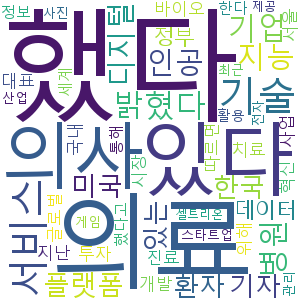

In [52]:
# WordCloud 라이브러리를 임포트합니다: 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud  

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = '/content/malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud 생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['단어'], word_count_tf['빈도']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

# TF-IDF 및 워드크라우드 시각화

In [53]:
# TfidfTransformer를 임포트합니다: TF-IDF 값을 계산하기 위한 도구입니다.
from sklearn.feature_extraction.text import TfidfTransformer  

# TfidfTransformer 객체를 생성합니다. 이는 문서-단어 행렬의 단어 빈도수를 TF-IDF 값으로 변환하기 위한 준비 단계입니다.
trans = TfidfTransformer()

# 문서-단어 행렬에 대해 TF-IDF 변환을 수행합니다. 이는 각 단어의 중요도를 수치화하는 단계입니다.
dtm2 = trans.fit_transform(tdm)

# 단어와 그 TF-IDF 값을 담은 데이터프레임을 생성합니다. 이는 단어의 중요도 분석을 위한 단계입니다.
df2 = pd.DataFrame({'단어': cv.get_feature_names_out(), 'tf-idf': dtm2.sum(axis=0).flat})

# TF-IDF 값을 기준으로 내림차순으로 정렬합니다. 이는 중요한 단어를 확인하기 위한 단계입니다.
df2 = df2.sort_values('tf-idf', ascending=False)

# 인덱스를 재설정합니다. 이는 데이터의 가독성을 높이기 위한 단계입니다.
df2 = df2.reset_index(drop=True)
df2.index = df2.index + 1

# TF-IDF 값을 'tf_idf.csv' 파일로 저장합니다. 결과를 저장하는 단계입니다. 인코딩을 cp949로 설정하여 한글이 깨지지 않게 합니다.
df2.to_csv('tf_idf.csv', encoding='cp949')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


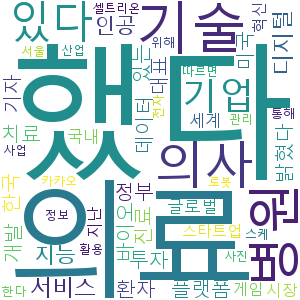

In [54]:

from wordcloud import WordCloud  # WordCloud 임포트

# 한글 폰트 경로 지정
font_path = '/content/malgun.ttf'

# WordCloud 객체를 다시 생성합니다. 이번에는 TF-IDF 값을 기반으로 가장 중요한 단어를 시각화합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path)

# TF-IDF 값을 기반으로 단어 빈도 사전을 생성합니다.
count_dic = dict(zip(df2['단어'], df2['tf-idf']))

# WordCloud를 이용해 TF-IDF 값을 시각화합니다. 이는 중요한 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_image()

# LDA분석

In [1]:
# LDA 분석을 위한 라이브러리 임포트
import gensim.corpora as corpora
import gensim
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt  # 시각화
import pandas as pd


In [2]:

# CSV 파일에서 데이터 불러오기
data = pd.read_csv('정제파일.csv', encoding='utf-8')
data = data.astype('str')
data=data['제목_본문']
# # 특수문자 '\\' 및 "'"을 제거
# data=data.str.replace(pat="\\",repl="") #수정 및 삭제제 ##바꾸는곳
# data=data.str.replace(pat="\'",repl="")
# data=data.str.replace(pat="/",repl="")
# data=data.str.replace(pat="[",repl="")
# data=data.str.replace(pat="]",repl="")
# data=data.str.replace(pat=",",repl="")


In [3]:
data

0       ['트럼프', '주황', '죄수복', '입고', '바닥', '청소', '사진', '...
1       ['트럼프', '체포', '됐다고', '만든', '가짜', '사진', '퍼지며', ...
2       ['트럼프', '체포', '됐다', '다리', '이상해', '가짜', '이미지', ...
3       ['허용', '규제', '논란', '시민단체', '사회', '경제', '손실', '...
4       ['비브', '스튜', '디오스', '몬스터', '유니온', '드라마', '공동',...
                              ...                        
5606    ['경기', '도정', '디지털', '전환', '청사진', '경기도', '인공', ...
5607    ['횡단보도', '휠체어', '감지', '보행', '신호', '연장', '산시', ...
5608    ['향기', '기억', '하시나요', '우연', '기회', '차로', '두어', '...
5609    ['라이프', '트렌드', '신제품', '얻은', '만족', '쓸수록', '진화',...
5610    ['공무원', '추첨', '꺼낸', '약사', '출신', '약사', '추첨', '지...
Name: 제목_본문, Length: 5611, dtype: object

In [4]:
# '제목_본문' 열의 데이터를 ','로 분할하여 토큰 리스트로 저장
token = [keywords.split() for keywords in data]

# 토큰 리스트 생성 후, 딕셔너리 생성
id2word = corpora.Dictionary(token)
#  빈도수가 너무 낮은 단어와 너무 높은 단어를 필터링합니다.
### no_below는 해당 빈도수 이하의 단어를 제거합니다.
### no_above는 해당 비율 이상의 문서에 나타나는 단어를 제거합니다. (예: 0.5는 전체 문서의 50% 이상에 나타나는 단어를 제거)
id2word.filter_extremes(no_below=3, no_above=0.1)

# 새로운 조건을 적용하여 corpus를 다시 생성합니다.
corpus = [id2word.doc2bow(text) for text in token]

In [5]:
import numpy as np

perplexity_values = []

# 다양한 토픽 수에 대해 Perplexity 계산
for i in range(3, 10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word)
    perplexity = np.exp2(-lda_model.log_perplexity(corpus))
    perplexity_values.append(perplexity)


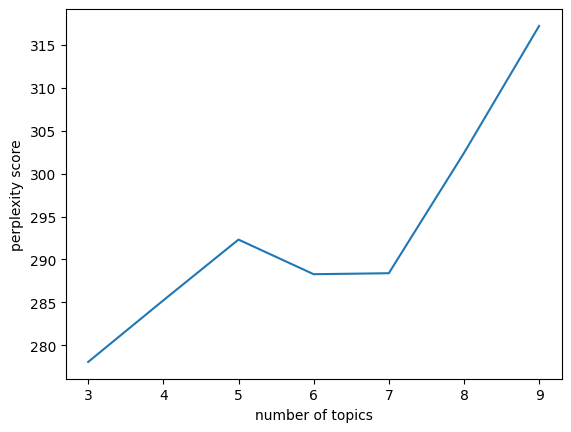

In [6]:
# Perplexity 그래프 시각화
import matplotlib.pyplot as plt

x = range(3, 10)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [7]:
from gensim.models import CoherenceModel  # CoherenceModel 임포트

coherence_values = []

# 다양한 토픽 수에 대해 Coherence 계산
for i in range(3, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=token, dictionary=id2word, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

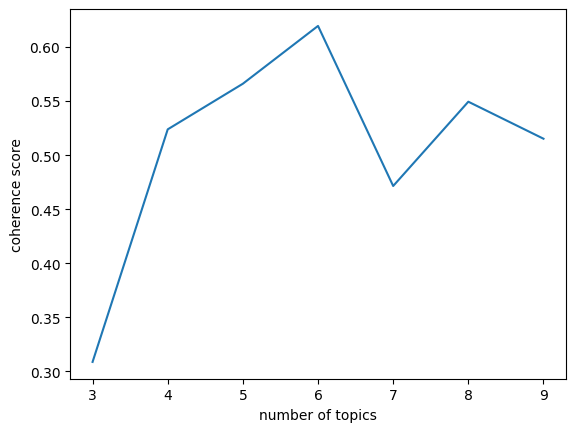

In [8]:
x = range(3, 10)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [9]:
k=5 ###적정토픽수 입력 coherence를 최대로 하고 perpelxity를 최소로 하는 적절합 토픽수

In [10]:
#적정토픽에 해당 되는 단어를 구하기!
from gensim import corpora, models, similarities
# 적절한 토픽 수를 설정하여 LDA 모델 훈련
model = LdaModel(corpus=corpus, num_topics=k, id2word=id2word, passes=15)  # num_topic에 적절 토픽 수 설정
topics = model.print_topics(num_words=10) ####토픽당 단어수설정


In [11]:
topics

[(0,
  '0.016*"\'반도체\'," + 0.015*"\'전자\'," + 0.010*"\'자율\'," + 0.010*"\'중국\'," + 0.010*"\'투자\'," + 0.008*"\'그룹\'," + 0.007*"\'미래\'," + 0.007*"\'자동차\'," + 0.007*"\'삼성\'," + 0.006*"\'시장\',"'),
 (1,
  '0.007*"\'인간\'," + 0.007*"\'사람\'," + 0.006*"\'로봇\'," + 0.006*"\'스타트업\'," + 0.005*"\'활용\'," + 0.005*"\'시대\'," + 0.005*"\'우리\'," + 0.004*"\'공개\'," + 0.004*"\'서비스\'," + 0.004*"\'챗봇\',"'),
 (2,
  '0.065*"\'지방\'," + 0.051*"\'현재\'," + 0.049*"\'오후\'," + 0.047*"\'아침\'," + 0.033*"\'보이\'," + 0.033*"\'부산\'," + 0.023*"\'오전\'," + 0.023*"\'있습니다\'," + 0.022*"\'대부분\'," + 0.022*"\'예상\',"'),
 (3,
  '0.011*"\'디지털\'," + 0.009*"\'혁신\'," + 0.007*"\'스마트\'," + 0.007*"\'서비스\'," + 0.006*"\'연구\'," + 0.006*"\'기반\'," + 0.006*"\'분야\'," + 0.006*"\'플랫폼\'," + 0.006*"\'센터\'," + 0.006*"\'정부\',"'),
 (4,
  '0.023*"\'교육\'," + 0.012*"\'대학\'," + 0.010*"\'인재\'," + 0.009*"\'학교\'," + 0.008*"\'학생\'," + 0.008*"\'양성\'," + 0.007*"\'지원\'," + 0.006*"\'학과\'," + 0.006*"\'미래\'," + 0.005*"\'프로그램\',"')]

In [66]:
# 도출된 토픽을 CSV 파일로 저장
TOPIC={'topics':topics}
TOPIC=pd.DataFrame(TOPIC)
TOPIC.to_csv('lda_result.csv',encoding='cp949')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
!pip install pyLDAvis  # pyLDAvis 패키지 설치
!pip uninstall pandas   # y 입력

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found existing installation: pandas 2.2.1
Uninstalling pandas-2.2.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-2.2.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.2.1


In [72]:
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [73]:
#세션다시시작시 취소해주세요!

import pyLDAvis
import pyLDAvis.gensim_models


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
pyLDAvis.enable_notebook() # Jupyter Notebook에서 pyLDAvis 시각화를 사용할 수 있도록 설정
# pyLDAvis를 이용해 LDA 모델 시각화
vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
vis  # 시각화 객체 출력

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.153166 -0.005981       1        1  56.662199
5     -0.169303 -0.005482       2        1  33.385686
4     -0.153107 -0.055522       3        1   5.082178
2      0.275743  0.361410       4        1   2.480847
1      0.355946 -0.304584       5        1   1.375829
3     -0.156114  0.010159       6        1   1.013262, topic_info=    Term        Freq       Total Category  logprob  loglift
217   정보  230.000000  230.000000  Default  30.0000  30.0000
522   활용  210.000000  210.000000  Default  29.0000  29.0000
664   교육  147.000000  147.000000  Default  28.0000  28.0000
136   대표  250.000000  250.000000  Default  27.0000  27.0000
1     관련  191.000000  191.000000  Default  26.0000  26.0000
..   ...         ...         ...      ...      ...      ...
20    진행    3.592863  117.971185   Topic6  -5.3724   1.1005
180   뉴스    2.792975   82.305107   Topic6  -5.6242   1.2087
418  동영상    2.180337   42.537226   Topic6  -5.8718   1.6211
45    생활    2.137090   43.627910   Topic6  -5.8919   1.5757
257   영상    2.143849  118.292263   Topic6  -5.8887   0.5814

[309 rows x 6 columns], token_table=      Topic      Freq Term
term                      
976       1  0.007278  갤럭시
976       2  0.989868  갤럭시
489       1  0.505392   건강
489       4  0.480739   건강
2101      3  0.920873   건설
...     ...       ...  ...
3950      4  0.942666   회수
3950      6  0.024807   회수
488       1  0.457195   효과
488       3  0.105507   효과
488       5  0.422026   효과

[450 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 3, 2, 4])